### https://www.kaggle.com/datasets/masterdatasan/lung-cancer-mortality-datasets-v2/data


In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
df=pd.read_csv("lung_cancer_mortality_data_large_v2.csv")

In [158]:
df.head()

,id,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Female,Germany,2016-04-07,Stage III,2016-04-21,No,Never Smoked,31.1,257,1,1,0,0,Combined,2017-11-15,0
1,2,50.0,Male,Czech Republic,2023-04-22,Stage III,2023-05-02,Yes,Passive Smoker,25.9,208,1,0,0,0,Radiation,2024-04-25,0
2,3,65.0,Male,Romania,2023-04-07,Stage IV,2023-04-12,No,Never Smoked,18.9,193,0,0,0,0,Surgery,2025-03-11,0
3,4,51.0,Female,Latvia,2016-02-07,Stage III,2016-02-13,Yes,Former Smoker,34.6,249,1,1,1,0,Surgery,2017-04-14,1
4,5,37.0,Male,Greece,2023-12-01,Stage I,2023-12-03,Yes,Never Smoked,40.2,262,0,0,0,0,Chemotherapy,2024-09-20,0


<Axes: xlabel='survived', ylabel='count'>

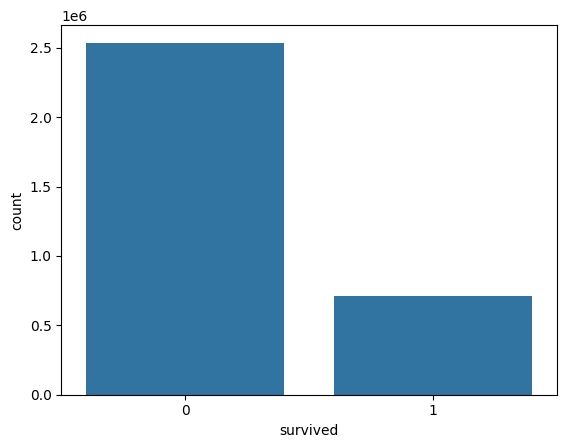

In [159]:
sns.countplot(x='survived',data=df)

In [160]:
for col in df.columns:
    print(f'the unique value in {col} are :',df[col].unique())

the unique value in id are : [      1       2       3 ... 3249998 3249999 3250000]
the unique value in age are : [ 64.  50.  65.  51.  37.  49.  56.  48.  47.  67.  45.  46.  21.  62.
  60.  57.  36.  61.  71.  74.  35.  54.  44.  68.  59.  58.  63.  69.
  70.  52.  40.  78.  75.  72.  42.  53.  39.  66.  41.  43.  55.  38.
  30.  34.  76.  73.  80.  31.  85.  28.  79.  87.  77.  33.  32.  25.
  90.  84.  81.  27.  82.  83.  22.  86.  26.  93.  29.  23.  19.  24.
  89.  18.  91.  95.  88.  20.  94. 101.  15.  92.  16.  17.  10.  14.
  99.  13.  97.   9.  12.  98.   7.  96.   4. 104.   8.  11. 100.   6.]
the unique value in gender are : ['Female' 'Male']
the unique value in country are : ['Germany' 'Czech Republic' 'Romania' 'Latvia' 'Greece' 'Finland'
 'Denmark' 'France' 'Slovakia' 'Hungary' 'Estonia' 'Portugal' 'Croatia'
 'Netherlands' 'Austria' 'Poland' 'Lithuania' 'Italy' 'Belgium' 'Slovenia'
 'Ireland' 'Spain' 'Sweden' 'Bulgaria' 'Malta' 'Luxembourg' 'Cyprus']
the unique value in d

In [161]:
df.drop('id',axis=1,inplace=True)

In [162]:
cls_1_count = df['survived'].value_counts()[1]
df = pd.concat([df.query('survived==0').sample(cls_1_count),df.query('survived==1')]).sample(cls_1_count*2)

In [163]:
df.isnull().sum()

age                            0
gender                         0
country                        0
diagnosis_date                 0
cancer_stage                   0
beginning_of_treatment_date    0
family_history                 0
smoking_status                 0
bmi                            0
cholesterol_level              0
hypertension                   0
asthma                         0
cirrhosis                      0
other_cancer                   0
treatment_type                 0
end_treatment_date             0
survived                       0
dtype: int64

In [164]:
df['gender'] =df['gender'].eq('Male').astype(int)

In [165]:
df['gender']

1547517    1
1624013    1
2358223    1
3048505    1
927925     1
          ..
2854985    1
740418     0
54655      1
2593104    0
2495501    1
Name: gender, Length: 1427404, dtype: int32

In [166]:
df['family_history']=df['family_history'].eq('Yes').astype(int)

In [167]:
df['family_history'].unique()

array([1, 0])

In [168]:
df.head()

,age,gender,country,diagnosis_date,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
1547517,49.0,1,Poland,2024-02-09,Stage I,2024-02-28,1,Passive Smoker,30.6,263,0,0,0,0,Chemotherapy,2025-07-23,1
1624013,42.0,1,Poland,2021-01-30,Stage I,2021-02-09,1,Current Smoker,42.7,274,0,0,0,0,Combined,2022-02-04,1
2358223,72.0,1,Denmark,2016-04-10,Stage II,2016-04-28,0,Never Smoked,19.8,160,1,1,0,0,Surgery,2017-04-15,0
3048505,64.0,1,France,2020-05-29,Stage III,2020-06-09,1,Current Smoker,37.7,296,1,0,0,0,Chemotherapy,2021-11-17,0
927925,47.0,1,Bulgaria,2023-02-15,Stage IV,2023-02-21,0,Current Smoker,38.2,288,0,1,0,1,Chemotherapy,2024-07-31,0


In [169]:
df['diagnosis_date']=pd.to_datetime(df['diagnosis_date'])

In [170]:
df=df.assign(diagnosis_year=df['diagnosis_date'].dt.year,
             diagnosis_month=df['diagnosis_date'].dt.month,
             diagnosis_day=df['diagnosis_date'].dt.day)

In [171]:
df.drop('diagnosis_date',axis=1,inplace=True)
df.head()

,age,gender,country,cancer_stage,beginning_of_treatment_date,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,diagnosis_year,diagnosis_month,diagnosis_day
1547517,49.0,1,Poland,Stage I,2024-02-28,1,Passive Smoker,30.6,263,0,0,0,0,Chemotherapy,2025-07-23,1,2024,2,9
1624013,42.0,1,Poland,Stage I,2021-02-09,1,Current Smoker,42.7,274,0,0,0,0,Combined,2022-02-04,1,2021,1,30
2358223,72.0,1,Denmark,Stage II,2016-04-28,0,Never Smoked,19.8,160,1,1,0,0,Surgery,2017-04-15,0,2016,4,10
3048505,64.0,1,France,Stage III,2020-06-09,1,Current Smoker,37.7,296,1,0,0,0,Chemotherapy,2021-11-17,0,2020,5,29
927925,47.0,1,Bulgaria,Stage IV,2023-02-21,0,Current Smoker,38.2,288,0,1,0,1,Chemotherapy,2024-07-31,0,2023,2,15


In [172]:
df['beginning_of_treatment_date']=pd.to_datetime(df['beginning_of_treatment_date'])

In [173]:
df=df.assign(beginning_of_treatment_year=df['beginning_of_treatment_date'].dt.year,
             beginning_of_treatment_month=df['beginning_of_treatment_date'].dt.month,
             beginning_of_treatment_day=df['beginning_of_treatment_date'].dt.day)

In [174]:
df.drop('beginning_of_treatment_date',axis=1,inplace=True)

In [175]:
df.head()

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,diagnosis_year,diagnosis_month,diagnosis_day,beginning_of_treatment_year,beginning_of_treatment_month,beginning_of_treatment_day
1547517,49.0,1,Poland,Stage I,1,Passive Smoker,30.6,263,0,0,0,0,Chemotherapy,2025-07-23,1,2024,2,9,2024,2,28
1624013,42.0,1,Poland,Stage I,1,Current Smoker,42.7,274,0,0,0,0,Combined,2022-02-04,1,2021,1,30,2021,2,9
2358223,72.0,1,Denmark,Stage II,0,Never Smoked,19.8,160,1,1,0,0,Surgery,2017-04-15,0,2016,4,10,2016,4,28
3048505,64.0,1,France,Stage III,1,Current Smoker,37.7,296,1,0,0,0,Chemotherapy,2021-11-17,0,2020,5,29,2020,6,9
927925,47.0,1,Bulgaria,Stage IV,0,Current Smoker,38.2,288,0,1,0,1,Chemotherapy,2024-07-31,0,2023,2,15,2023,2,21


In [176]:
df['end_treatment_date']=pd.to_datetime(df['end_treatment_date'])

In [177]:
df=df.assign(end_treatment_year=df['end_treatment_date'].dt.year,
             end_treatment_month=df['end_treatment_date'].dt.month,
             end_treatment_day=df['end_treatment_date'].dt.day)

In [178]:
df.drop('end_treatment_date',axis=1,inplace=True)

In [179]:
pd.set_option('display.max_columns', None)
df.head()

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,diagnosis_year,diagnosis_month,diagnosis_day,beginning_of_treatment_year,beginning_of_treatment_month,beginning_of_treatment_day,end_treatment_year,end_treatment_month,end_treatment_day
1547517,49.0,1,Poland,Stage I,1,Passive Smoker,30.6,263,0,0,0,0,Chemotherapy,1,2024,2,9,2024,2,28,2025,7,23
1624013,42.0,1,Poland,Stage I,1,Current Smoker,42.7,274,0,0,0,0,Combined,1,2021,1,30,2021,2,9,2022,2,4
2358223,72.0,1,Denmark,Stage II,0,Never Smoked,19.8,160,1,1,0,0,Surgery,0,2016,4,10,2016,4,28,2017,4,15
3048505,64.0,1,France,Stage III,1,Current Smoker,37.7,296,1,0,0,0,Chemotherapy,0,2020,5,29,2020,6,9,2021,11,17
927925,47.0,1,Bulgaria,Stage IV,0,Current Smoker,38.2,288,0,1,0,1,Chemotherapy,0,2023,2,15,2023,2,21,2024,7,31


In [180]:
for col in df.columns:
    print(f'the unique value in {col} are :',df[col].unique())

the unique value in age are : [ 49.  42.  72.  64.  47.  51.  56.  57.  74.  58.  55.  79.  43.  61.
  41.  34.  59.  66.  54.  67.  60.  65.  63.  68.  53.  48.  76.  70.
  52.  46.  77.  39.  44.  28.  50.  62.  71.  75.  45.  26.  32.  69.
  73.  37.  40.  78.  84.  33.  38.  35.  36.  80.  81.  30.  83.  31.
  85.  91.  29.  25.  21.  86.  27.  90.  20.  87.  82.  22.  24.  89.
  23.  88.  15.  19.  13.  17.  95.  16.  92.  14.  96.   9. 100.  94.
  93.  18. 101.   8.   7. 104.  99.  10.  97.  12.  11.  98.   4.]
the unique value in gender are : [1 0]
the unique value in country are : ['Poland' 'Denmark' 'France' 'Bulgaria' 'Czech Republic' 'Portugal'
 'Italy' 'Romania' 'Belgium' 'Spain' 'Greece' 'Germany' 'Ireland'
 'Estonia' 'Latvia' 'Luxembourg' 'Cyprus' 'Hungary' 'Lithuania' 'Sweden'
 'Finland' 'Malta' 'Croatia' 'Netherlands' 'Slovakia' 'Austria' 'Slovenia']
the unique value in cancer_stage are : ['Stage I' 'Stage II' 'Stage III' 'Stage IV']
the unique value in family_history a

In [181]:
y=df['survived']

In [182]:
df.drop('survived',axis=1,inplace=True)

In [183]:
df

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,diagnosis_year,diagnosis_month,diagnosis_day,beginning_of_treatment_year,beginning_of_treatment_month,beginning_of_treatment_day,end_treatment_year,end_treatment_month,end_treatment_day
1547517,49.0,1,Poland,Stage I,1,Passive Smoker,30.6,263,0,0,0,0,Chemotherapy,2024,2,9,2024,2,28,2025,7,23
1624013,42.0,1,Poland,Stage I,1,Current Smoker,42.7,274,0,0,0,0,Combined,2021,1,30,2021,2,9,2022,2,4
2358223,72.0,1,Denmark,Stage II,0,Never Smoked,19.8,160,1,1,0,0,Surgery,2016,4,10,2016,4,28,2017,4,15
3048505,64.0,1,France,Stage III,1,Current Smoker,37.7,296,1,0,0,0,Chemotherapy,2020,5,29,2020,6,9,2021,11,17
927925,47.0,1,Bulgaria,Stage IV,0,Current Smoker,38.2,288,0,1,0,1,Chemotherapy,2023,2,15,2023,2,21,2024,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854985,52.0,1,Hungary,Stage III,1,Never Smoked,44.3,258,1,1,0,0,Surgery,2014,12,21,2014,12,23,2015,10,29
740418,59.0,0,Sweden,Stage II,1,Former Smoker,37.9,276,0,0,0,0,Chemotherapy,2019,3,31,2019,4,11,2020,7,17
54655,55.0,1,Lithuania,Stage III,1,Current Smoker,42.6,295,1,0,0,0,Chemotherapy,2021,3,3,2021,3,15,2021,10,11
2593104,51.0,0,Italy,Stage II,0,Former Smoker,26.1,201,0,0,0,0,Surgery,2023,6,1,2023,6,5,2025,5,28


In [184]:
X=df

In [185]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Define the transformations for each column type
transformer = ColumnTransformer(
    transformers=[ 
        ('ohe',OneHotEncoder(sparse_output=False), [2,3,5,12])  # One-hot encode categorical features
    ],remainder=StandardScaler()
).set_output(transform='pandas')




In [186]:
# Apply transformations
X = transformer.fit_transform(X)

# Display the transformed data
print("Transformed Data:")
X

Transformed Data:


,ohe__country_Austria,ohe__country_Belgium,ohe__country_Bulgaria,ohe__country_Croatia,ohe__country_Cyprus,ohe__country_Czech Republic,ohe__country_Denmark,ohe__country_Estonia,ohe__country_Finland,ohe__country_France,ohe__country_Germany,ohe__country_Greece,ohe__country_Hungary,ohe__country_Ireland,ohe__country_Italy,ohe__country_Latvia,ohe__country_Lithuania,ohe__country_Luxembourg,ohe__country_Malta,ohe__country_Netherlands,ohe__country_Poland,ohe__country_Portugal,ohe__country_Romania,ohe__country_Slovakia,ohe__country_Slovenia,ohe__country_Spain,ohe__country_Sweden,ohe__cancer_stage_Stage I,ohe__cancer_stage_Stage II,ohe__cancer_stage_Stage III,ohe__cancer_stage_Stage IV,ohe__smoking_status_Current Smoker,ohe__smoking_status_Former Smoker,ohe__smoking_status_Never Smoked,ohe__smoking_status_Passive Smoker,ohe__treatment_type_Chemotherapy,ohe__treatment_type_Combined,ohe__treatment_type_Radiation,ohe__treatment_type_Surgery,remainder__age,remainder__gender,remainder__family_history,remainder__bmi,remainder__cholesterol_level,remainder__hypertension,remainder__asthma,remainder__cirrhosis,remainder__other_cancer,remainder__diagnosis_year,remainder__diagnosis_month,remainder__diagnosis_day,remainder__beginning_of_treatment_year,remainder__beginning_of_treatment_month,remainder__beginning_of_treatment_day,remainder__end_treatment_year,remainder__end_treatment_month,remainder__end_treatment_day
1547517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.600254,0.999521,0.999157,0.012818,0.674831,-1.733087,-0.939510,-0.540919,-0.310054,1.744263,-1.311525,-0.766270,1.734915,-1.311977,1.392117,1.650428,0.139263,0.825819
1624013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.300192,0.999521,0.999157,1.458715,0.927892,-1.733087,-0.939510,-0.540919,-0.310054,0.714578,-1.601508,1.620898,0.705502,-1.311977,-0.766086,0.624924,-1.310819,-1.333453
2358223,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.699540,0.999521,-1.000844,-1.277734,-1.694734,0.577005,1.064385,-0.540919,-0.310054,-1.001565,-0.731560,-0.652595,-1.010186,-0.731964,1.392117,-1.084249,-0.730786,-0.083348
3048505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.899612,0.999521,0.999157,0.861237,1.434012,0.577005,-0.939510,-0.540919,-0.310054,0.371349,-0.441578,1.507224,0.362364,-0.151951,-0.766086,0.283090,1.299329,0.143944
927925,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.800236,0.999521,-1.000844,0.920985,1.249968,-1.733087,1.064385,-0.540919,3.225240,1.401035,-1.311525,-0.084222,1.391777,-1.311977,0.596990,1.308594,0.139263,1.734986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.300281,0.999521,0.999157,1.649908,0.559804,0.577005,1.064385,-0.540919,-0.310054,-1.688022,1.588300,0.597826,-1.696461,1.588088,0.824169,-1.767918,1.009313,1.507694
740418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.399656,-1.000479,0.999157,0.885136,0.973903,-1.733087,-0.939510,-0.540919,-0.310054,0.028121,-1.021543,1.734573,0.019227,-0.731964,-0.538907,-0.058745,0.139263,0.143944
54655,0.0,0.0

In [187]:
X.shape

(1427404, 57)

In [188]:
y

1547517    1
1624013    1
2358223    0
3048505    0
927925     0
          ..
2854985    0
740418     1
54655      1
2593104    0
2495501    1
Name: survived, Length: 1427404, dtype: int64

In [189]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=100)

In [190]:
X_train.shape

(999182, 57)

In [191]:
X_test.shape

(428222, 57)

In [192]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [193]:
#knn=KNeighborsClassifier(n_neighbors=5,n_jobs=5)
#knn.fit(X_train,y_train)

In [194]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=5,n_jobs=5)

In [195]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, n_jobs=5)

In [196]:
y_pred=rfc.predict(X_test)

In [198]:
metrics.precision_score(y_test,y_pred)

0.5005240333331781

<Axes: >

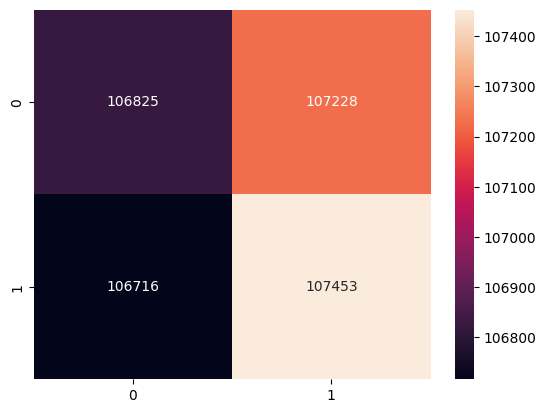

In [199]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

In [200]:
df

,age,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,diagnosis_year,diagnosis_month,diagnosis_day,beginning_of_treatment_year,beginning_of_treatment_month,beginning_of_treatment_day,end_treatment_year,end_treatment_month,end_treatment_day
1547517,49.0,1,Poland,Stage I,1,Passive Smoker,30.6,263,0,0,0,0,Chemotherapy,2024,2,9,2024,2,28,2025,7,23
1624013,42.0,1,Poland,Stage I,1,Current Smoker,42.7,274,0,0,0,0,Combined,2021,1,30,2021,2,9,2022,2,4
2358223,72.0,1,Denmark,Stage II,0,Never Smoked,19.8,160,1,1,0,0,Surgery,2016,4,10,2016,4,28,2017,4,15
3048505,64.0,1,France,Stage III,1,Current Smoker,37.7,296,1,0,0,0,Chemotherapy,2020,5,29,2020,6,9,2021,11,17
927925,47.0,1,Bulgaria,Stage IV,0,Current Smoker,38.2,288,0,1,0,1,Chemotherapy,2023,2,15,2023,2,21,2024,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2854985,52.0,1,Hungary,Stage III,1,Never Smoked,44.3,258,1,1,0,0,Surgery,2014,12,21,2014,12,23,2015,10,29
740418,59.0,0,Sweden,Stage II,1,Former Smoker,37.9,276,0,0,0,0,Chemotherapy,2019,3,31,2019,4,11,2020,7,17
54655,55.0,1,Lithuania,Stage III,1,Current Smoker,42.6,295,1,0,0,0,Chemotherapy,2021,3,3,2021,3,15,2021,10,11
2593104,51.0,0,Italy,Stage II,0,Former Smoker,26.1,201,0,0,0,0,Surgery,2023,6,1,2023,6,5,2025,5,28


In [201]:
def predict():
    input_values=[]
   
    age=float(app.age_entry.get())
    input_values.append(age)
    sex=app.sex_var.get()
    if sex=='Male':
        input_values.append(1)
    else:
        input_values.append(0)
    


    country=app.country_var.get() 
    input_values.append(country)

    


    cancer_stage=app.cancer_stage_var.get()
    input_values.append(cancer_stage)

    family_history=app.family_history_var.get()
    if family_history=='Yes':
        input_values.append(1)
    else:
        input_values.append(0)
        

    smoking_status=app.smoking_status_var.get()
    input_values.append(smoking_status)

    bmi=float(app.bmi_entry.get())
    input_values.append(bmi)

    cholesterol_level=float(app.cholesterol_level_entry.get())
    input_values.append(cholesterol_level)

    hypertension=app.hypertension_var.get()
    if hypertension=='Yes':
        input_values.append(1)
    else:

        input_values.append(0)

    #asthma
    asthma=app.asthma_var.get()
    if asthma=='Yes':
        input_values.append(1)
    else:
        input_values.append(0)
    
    
    cirrhosis=app.cirrhosis_var.get()
    if cirrhosis=='Yes':
        input_values.append(1)
    else:
        input_values.append(0)

    other_cancer=app.other_cancer_var.get()
    if other_cancer=='Yes':
        input_values.append(1)
    else:
        input_values.append(0)



    treatment_type=app.treatment_type_var.get()
    input_values.append(treatment_type)
    #diagnosis Year
    diagnosis_year=app.diagnosis_year_entry.get()
    diagnosis_y,diagnosis_m,diagnosis_d=diagnosis_year.split('-')
    input_values.append(diagnosis_y)
    input_values.append(diagnosis_m)
    input_values.append(diagnosis_d)
    
    #beginning_of_treatment_year
    beginning_of_treatment_year=app.beginning_year_entry.get()
    beginning_y,beginning_m,beginning_d=beginning_of_treatment_year.split('-')
    input_values.append(beginning_y)
    input_values.append(beginning_m)
    input_values.append(beginning_d)

    #end_treatment_year

    end_treatment_year=app.end_year_entry.get()
    end_y,end_m,end_d=end_treatment_year.split('-')
    input_values.append(end_y)
    input_values.append(end_m)
    input_values.append(end_d)

    input_values = [input_values]
    app.output_entry.delete(0,tk.END)
    print(input_values)
    observation = transformer.transform(input_values)
    prediction = rfc.predict(observation)[0]
    if prediction==1:
        prediction='Dont die:)'
    else:
        prediction='You will Diee :('
    app.output_entry.insert(tk.END,prediction)



In [203]:
import tkinter as tk
from tkinter import ttk
class Model:
    def __init__(self, root):
        self.root = root
        self.root.title("Model Deployment with tkinter")

        # Create a main frame to hold all the widgets
        self.main_frame = tk.Frame(self.root)
        self.main_frame.pack(padx=10, pady=10)

        # Create a dictionary to store the user input
        self.user_input = {}

        # Age
        tk.Label(self.main_frame, text="Enter Age:").grid(row=0, column=0, padx=5, pady=(5, 10))
        self.age_entry = tk.Entry(self.main_frame, width=20)
        self.age_entry.grid(row=0, column=1, padx=5, pady=5)

        # Sex
        tk.Label(self.main_frame, text="Choose Sex:").grid(row=1, column=0, padx=5, pady=(5, 10))
        self.sex_var = tk.StringVar()
        self.sex_var.set("Male")
        male_radio = tk.Radiobutton(self.main_frame, text="Male", variable=self.sex_var, value="Male")
        male_radio.grid(row=1, column=1, padx=5, pady=5)
        female_radio = tk.Radiobutton(self.main_frame, text="Female", variable=self.sex_var, value="Female")
        female_radio.grid(row=1, column=2, padx=5, pady=5)

        # country
        tk.Label(self.main_frame, text="Choose country:").grid(row=2, column=0, padx=5, pady=(5, 10))
        self.country_var = tk.StringVar()
        country_combobox = ttk.Combobox(self.main_frame, textvariable=self.country_var)
        country_combobox['values'] = ('Germany', 'Czech Republic', 'Romania', 'Latvia', 'Greece',
       'Finland', 'Denmark', 'France', 'Slovakia', 'Hungary', 'Estonia',
       'Portugal', 'Croatia', 'Netherlands', 'Austria', 'Poland',
       'Lithuania', 'Italy', 'Belgium', 'Slovenia', 'Ireland', 'Spain',
       'Sweden', 'Bulgaria', 'Malta', 'Luxembourg', 'Cyprus')
        country_combobox.current(0)
        country_combobox.grid(row=2, column=1, padx=5, pady=5)

        # cancer_stage
        tk.Label(self.main_frame, text="Choose cancer stage:").grid(row=3, column=0, padx=5, pady=(5, 10))
        self.cancer_stage_var = tk.StringVar()
        cancer_stage_combobox = ttk.Combobox(self.main_frame, textvariable=self.cancer_stage_var)
        cancer_stage_combobox['values'] = ('Stage III', 'Stage IV', 'Stage I', 'Stage II')
        cancer_stage_combobox.current(2)
        cancer_stage_combobox.grid(row=3, column=1, padx=5, pady=5)

        # family_history
        tk.Label(self.main_frame, text="Family History:").grid(row=4, column=0, padx=5, pady=(5, 10))
        self.family_history_var = tk.StringVar()
        family_history_combobox = ttk.Combobox(self.main_frame, textvariable=self.family_history_var)
        family_history_combobox['values'] = ('Yes','No')
        family_history_combobox.current(0)
        family_history_combobox.grid(row=4, column=1, padx=5, pady=5)

        # smoking_status
        tk.Label(self.main_frame, text="Choose smoking status:").grid(row=5, column=0, padx=5, pady=(5, 10))
        self.smoking_status_var = tk.StringVar()
        smoking_status_combobox = ttk.Combobox(self.main_frame, textvariable=self.smoking_status_var)
        smoking_status_combobox['values'] = ('Never Smoked', 'Passive Smoker', 'Former Smoker',
       'Current Smoker')
        smoking_status_combobox.current(0)
        smoking_status_combobox.grid(row=5, column=1, padx=5, pady=5)

        # bmi
        tk.Label(self.main_frame, text="Enter bmi:").grid(row=6, column=0, padx=5, pady=(5, 10))
        self.bmi_entry = tk.Entry(self.main_frame, width=20)
        self.bmi_entry.grid(row=6, column=1, padx=5, pady=5)

        # cholesterol_level
        tk.Label(self.main_frame, text="Enter cholesterol levelion:").grid(row=7, column=0, padx=5, pady=(5, 10))
        self.cholesterol_level_entry = tk.Entry(self.main_frame, width=20)
        self.cholesterol_level_entry.grid(row=7, column=1, padx=5, pady=5)

        #hypertension
        tk.Label(self.main_frame, text="Choose hypertension:").grid(row=8, column=0, padx=5, pady=(5, 10))
        self.hypertension_var = tk.StringVar()
        hypertension_combobox = ttk.Combobox(self.main_frame, textvariable=self.hypertension_var)
        hypertension_combobox['values'] = ('Yes','No')
        hypertension_combobox.current(0)
        hypertension_combobox.grid(row=8, column=1, padx=5, pady=5)
        #asthma
        tk.Label(self.main_frame, text="Choose Asthma:").grid(row=9, column=0, padx=5, pady=(5, 10))
        self.asthma_var = tk.StringVar()
        asthma_combobox = ttk.Combobox(self.main_frame, textvariable=self.asthma_var)
        asthma_combobox['values'] = ('Yes','No')
        asthma_combobox.current(0)
        asthma_combobox.grid(row=9, column=1, padx=5, pady=5)
        #cirrhosis
        tk.Label(self.main_frame, text="Choose cirrhosis:").grid(row=10, column=0, padx=5, pady=(5, 10))
        self.cirrhosis_var = tk.StringVar()
        cirrhosis_combobox = ttk.Combobox(self.main_frame, textvariable=self.cirrhosis_var)
        cirrhosis_combobox['values'] = ('Yes','No')
        cirrhosis_combobox.current(0)
        cirrhosis_combobox.grid(row=10, column=1, padx=5, pady=5)
        #other_cancer
        tk.Label(self.main_frame, text="Choose Other Cancer:").grid(row=11, column=0, padx=5, pady=(5, 10))
        self.other_cancer_var = tk.StringVar()
        other_cancer_combobox = ttk.Combobox(self.main_frame, textvariable=self.other_cancer_var)
        other_cancer_combobox['values'] = ('Yes','No')
        other_cancer_combobox.current(0)
        other_cancer_combobox.grid(row=11, column=1, padx=5, pady=5)
        #treatment_type
        tk.Label(self.main_frame, text="Choose Treatment Type:").grid(row=12, column=0, padx=5, pady=(5, 10))
        self.treatment_type_var = tk.StringVar()
        treatment_type_combobox = ttk.Combobox(self.main_frame, textvariable=self.treatment_type_var)
        treatment_type_combobox['values'] = ('Combined', 'Radiation', 'Surgery', 'Chemotherapy')
        treatment_type_combobox.current(0)
        treatment_type_combobox.grid(row=12, column=1, padx=5, pady=5)
        #diagnosis_year
        tk.Label(self.main_frame, text="Enter Date of Diagnosis (YYYY-MM-DD):").grid(row=13, column=0, padx=5, pady=(5, 10))
        self.diagnosis_year_entry = tk.Entry(self.main_frame, width=20)
        self.diagnosis_year_entry.grid(row=13, column=1, padx=5, pady=5)
        #beginning_of_treatment_year
        tk.Label(self.main_frame, text="Enter Date of Beginning Of Treatment (YYYY-MM-DD):").grid(row=14, column=0, padx=5, pady=(5, 10))
        self.beginning_year_entry = tk.Entry(self.main_frame, width=20)
        self.beginning_year_entry.grid(row=14, column=1, padx=5, pady=5)
        
        
        #end_treatment_year
        tk.Label(self.main_frame, text="Enter Date of End Of Treatment (YYYY-MM-DD):").grid(row=15, column=0, padx=5, pady=(5, 10))
        self.end_year_entry = tk.Entry(self.main_frame, width=20)
        self.end_year_entry.grid(row=15, column=1, padx=5, pady=5)
        #
        #

        # Prediction Output
        label = tk.Label(self.root, text="Prediction Output:")
        label.pack()
        self.output_entry = tk.Entry(self.root, width=40)
        self.output_entry.pack()

        self.button = tk.Button(self.root, text="Predict", command=predict)
        self.button.pack()

root = tk.Tk()
app = Model(root) 
root.mainloop()



[[45.0, 1, 'Germany', 'Stage I', 1, 'Never Smoked', 44.0, 234.0, 1, 1, 1, 1, 'Combined', '2022', '01', '01', '2022', '02', '01', '2022', '03', '01']]


C:\Users\mhdza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\mhdza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[45.0, 1, 'Germany', 'Stage I', 1, 'Never Smoked', 44.0, 234.0, 1, 1, 1, 1, 'Chemotherapy', '2022', '01', '01', '2022', '02', '01', '2022', '03', '01']]


C:\Users\mhdza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\mhdza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[45.0, 1, 'Germany', 'Stage I', 1, 'Never Smoked', 44.0, 234.0, 1, 1, 1, 1, 'Radiation', '2022', '01', '01', '2022', '02', '01', '2022', '03', '01']]


C:\Users\mhdza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\mhdza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[[45.0, 1, 'Germany', 'Stage I', 1, 'Never Smoked', 44.0, 234.0, 0, 0, 0, 0, 'Radiation', '2022', '01', '01', '2022', '02', '01', '2022', '03', '01']]


C:\Users\mhdza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\mhdza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
